# Om Mistry

## **How does Educational attainment relate to gun deaths in America and what other factors affect this relationship ?**

Sub-Questions to achieve the above goal:
- Is there a correlation between educational attainment and gun deaths rates in the United States after controlling for other demographic and contextual factors, such as age, gender, race, religion and gun ownership rates ? This could be done using regression analysis to examine the contribution of education while keeping the other factors constant.
- To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ? This could be monitored by using the "intent" column of the dataset.
- Are there differences in the relationship between education and gun deaths across different age groups, race, or geographical regions? We could explore whether the protective effects of education are stronger for younger or elder individuals for certain racial groups.


## EDA (Exploratory Data Analysis)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("../data/raw/full_data.csv")
# Understanding the Datset 
raw_data.drop("Unnamed: 0", axis=1, inplace=True)
raw_data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [4]:
#Looking at the unique values of each variable in the dataset
raw_data.nunique(axis=0)

year           3
month         12
intent         4
police         2
sex            2
age          104
race           5
hispanic      39
place         10
education      4
dtype: int64

In [5]:
raw_data.describe()

,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607
std,0.816278,3.405609,0.117114,19.496181,61.595734
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


### Now we focus on cleaning our dataset to make it easier to work with.

In [6]:
# We will start cleaning the dataset by removing redundant columns which are not used by us in the research.
data_cleaned = raw_data.drop('hispanic',axis=1)
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [7]:
#Removing rows with null values
data_cleaned.dropna(axis=0)
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [10]:
#Sub setting data with only relevant columns 
df1 = data_cleaned[['age','sex','race','education','intent']]
# Descriptive Statistics by Educational level
df1.groupby('education').agg({'intent':'count','age':['mean','std']})


intent        age           
              count       mean        std
education                                
BA+           12945  54.093156  16.699053
HS/GED        42927  44.051157  18.775825
Less than HS  21823  36.573805  20.868200
Some college  21680  44.388394  17.846711

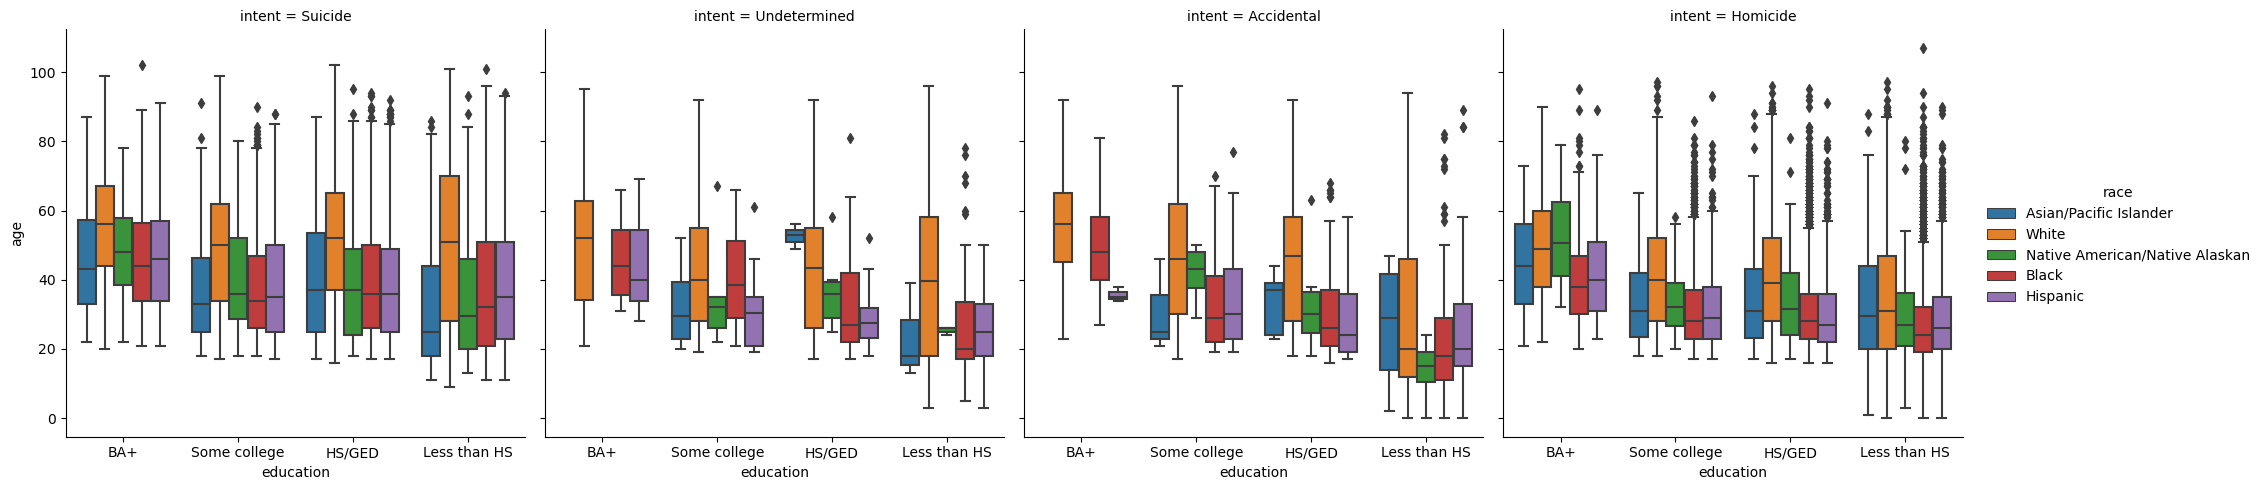

In [15]:
# Visualizing the relationship between education and gun deaths 
sns.catplot(data=df1, x='education', y='age',hue='race',col='intent',kind='box')

C:\Users\OM\AppData\Local\Temp\ipykernel_6316\2321811702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Death Type'] = df2['intent']
C:\Users\OM\AppData\Local\Temp\ipykernel_6316\2321811702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Death Type'] = df2['Death Type'].replace(['Accidental','Suicide','Homicide','NA','Undetermined'],


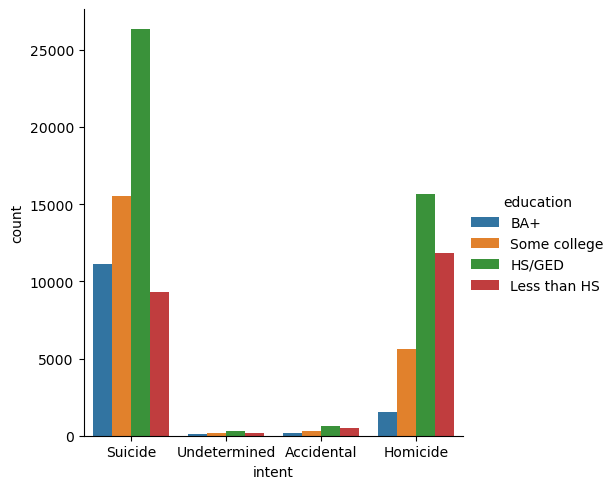

In [28]:
# Sub setting relevant columns from the main cleaned data set 
df2 = data_cleaned[['education','intent']]
# Creating a new variable indicating the type o death
df2['Death Type'] = df2['intent']
df2['Death Type'] = df2['Death Type'].replace(['Accidental','Suicide','Homicide','NA','Undetermined'],
                                            [ 'Unintentional','Suicide','Homicide','other','other'])
# Visualization the distribution of gun deaths by intent and education
sns.catplot(df2,x='intent',kind='count',hue='education')

Text(0, 0.5, 'Age of Victim')

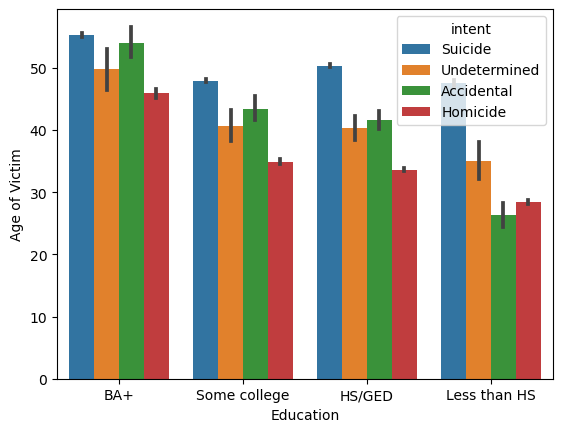

In [35]:
#Sub settng the data set again to work with variables that are relevant 
df3 = data_cleaned[['age','race','sex','education','intent','place']]
# Visualization
sns.barplot(df3, x='education', y='age', hue='intent')
plt.xlabel("Education")
plt.ylabel("Age of Victim")

In [ ]:
#Loading the processed data into a csv file
data_cleaned.to_csv('../data/processed/processed.csv', index=False)

# Observations from the above EDA
- The descriptive statistics shows that individuals with lower levels of education tend to have a higher rates of gun deaths.
- The box plots show that the relationship between education and gun deaths varies by race and intent. For example, for intentional deaths, the median age of victims decreases as education level increases, and this trend is more pronounced for White individuals than for other racial groups.
- The count plot distribution shows that most deaths are intentional (suicide or homicide) .
- The bar plot also gives an idea that the age of the victim gets lower with the amount of education they receive. For example, someone with an education less than HS is more likely to face gun violence of some kind (highly intentional) at a younger age than someone with a higher education.